In [21]:
# Task 1 Data Exploration (EDA)

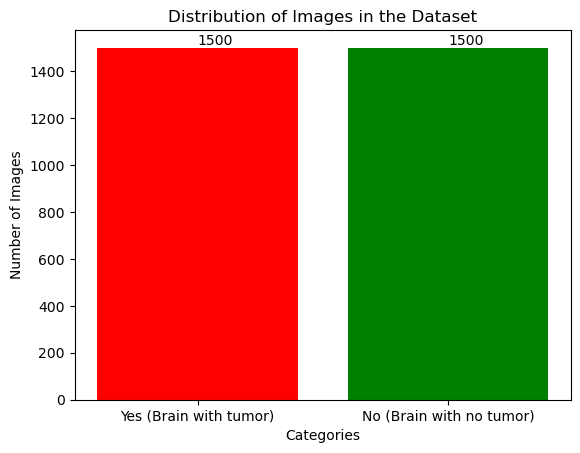

In [22]:
import os
import matplotlib.pyplot as plt

# Path to the dataset directory
dataset_dir = "MRI_Scan_dataset"

# Directories for 'yes' and 'no' categories
yes_dir = os.path.join(dataset_dir, 'yes')
no_dir = os.path.join(dataset_dir, 'no')

# Counting the number of images in each directory
num_yes_images = len([name for name in os.listdir(yes_dir) if os.path.isfile(os.path.join(yes_dir, name))])
num_no_images = len([name for name in os.listdir(no_dir) if os.path.isfile(os.path.join(no_dir, name))])

# Creating a bar chart to visualize the distribution
categories = ['Yes (Brain with tumor)', 'No (Brain with no tumor)']
counts = [num_yes_images, num_no_images]

bars = plt.bar(categories, counts, color=['red', 'green'])
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Distribution of Images in the Dataset')

# Adding count labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom')  # va: vertical alignment

plt.show()


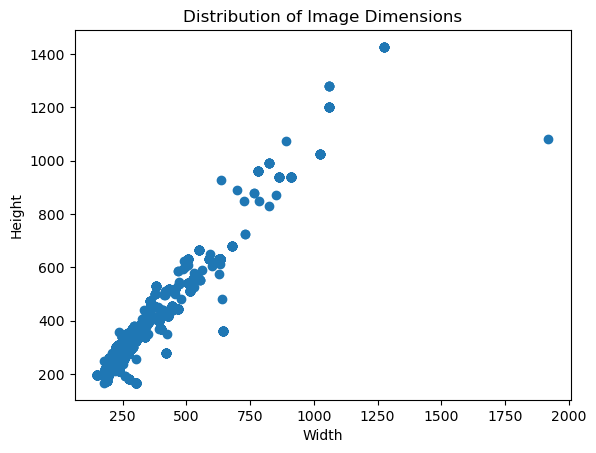

In [23]:
from PIL import Image
# Lists to store widths and heights of images
widths = []
heights = [] 

# Function to load images and get dimensions
def get_image_dimensions(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(directory, filename))
            width, height = img.size
            widths.append(width)
            heights.append(height)

# Getting dimensions of 'yes' and 'no' images
get_image_dimensions(os.path.join(dataset_dir, 'yes'))
get_image_dimensions(os.path.join(dataset_dir, 'no'))

# Creating a scatter plot of image widths and heights
plt.scatter(widths, heights)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Distribution of Image Dimensions')
plt.show()


In [24]:
# Set to store unique dimensions
unique_dimensions = set()

# Function to load images and get unique dimensions
def get_unique_dimensions(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(directory, filename))
            width, height = img.size
            unique_dimensions.add((width, height))

# Getting unique dimensions of 'yes' and 'no' images
get_unique_dimensions(os.path.join(dataset_dir, 'yes'))
get_unique_dimensions(os.path.join(dataset_dir, 'no'))

# Displaying the total number of unique dimensions
print(f"Total number of unique dimensions: {len(unique_dimensions)}")


Total number of unique dimensions: 291


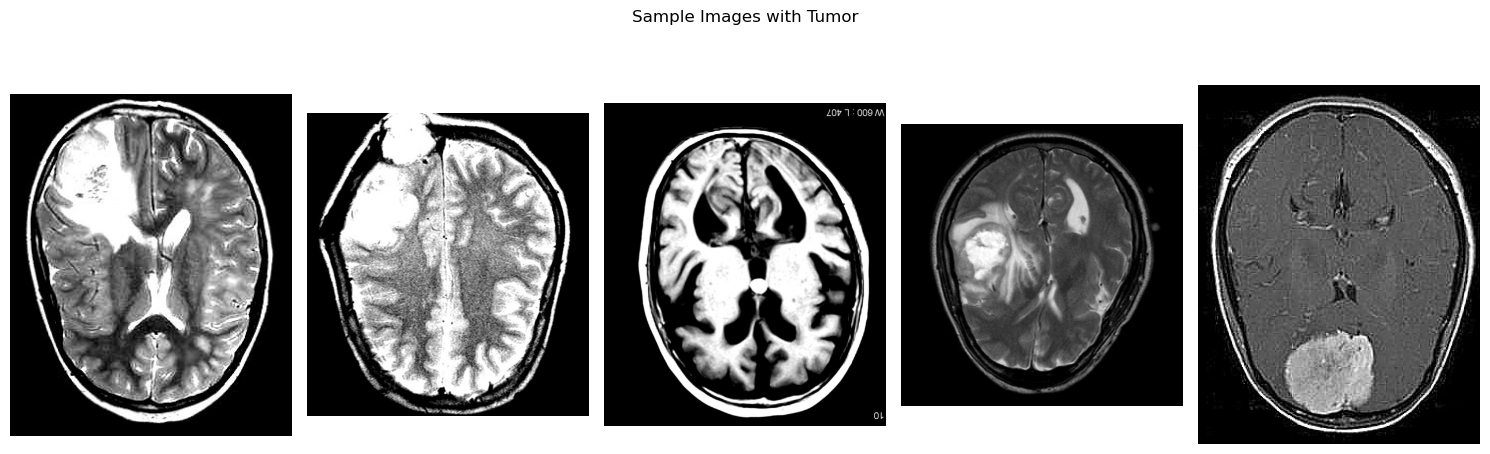

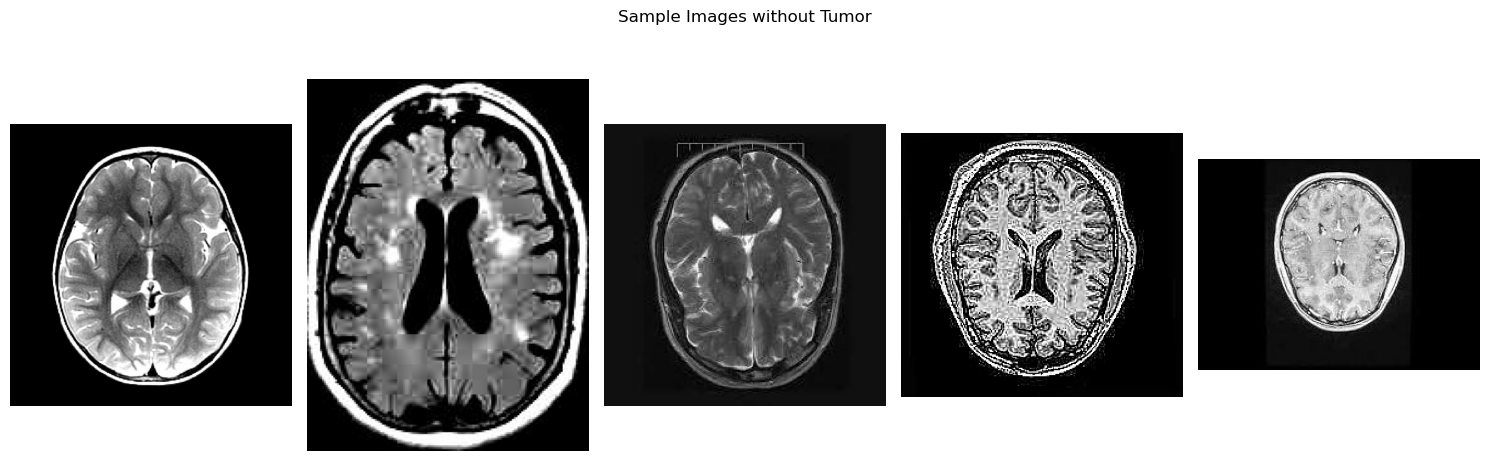

In [25]:
# Function to display sample images from a directory
def display_sample_images(directory, title, num_samples=5):
    filenames = os.listdir(directory)
    sample_filenames = filenames[:num_samples]
    
    plt.figure(figsize=(15, 5))
    plt.suptitle(title)
    
    for i, filename in enumerate(sample_filenames):
        img = Image.open(os.path.join(directory, filename))
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Displaying sample images from both categories
display_sample_images(os.path.join(dataset_dir, 'yes'), "Sample Images with Tumor")
display_sample_images(os.path.join(dataset_dir, 'no'), "Sample Images without Tumor")


In [36]:
pip install opencv-python 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np

def crop_brain_contour(image, output_size=(224, 224)):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply binary thresholding
    _, thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Get the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Get the extreme points of the largest contour
    x_min, x_max, y_min, y_max = 10000, 0, 10000, 0
    for coord in largest_contour:
        x, y = coord[0]
        x_min = min(x_min, x)
        x_max = max(x_max, x)
        y_min = min(y_min, y)
        y_max = max(y_max, y)
    
    # Crop the image using the extreme points
    cropped_img = image[y_min:y_max, x_min:x_max]
    
    # Resize the cropped image to the specified output size
    resized_img = cv2.resize(cropped_img, output_size, interpolation=cv2.INTER_AREA)
    
    return resized_img

# can call this function and pass an image to it
# processed_image = crop_brain_contour(your_image)


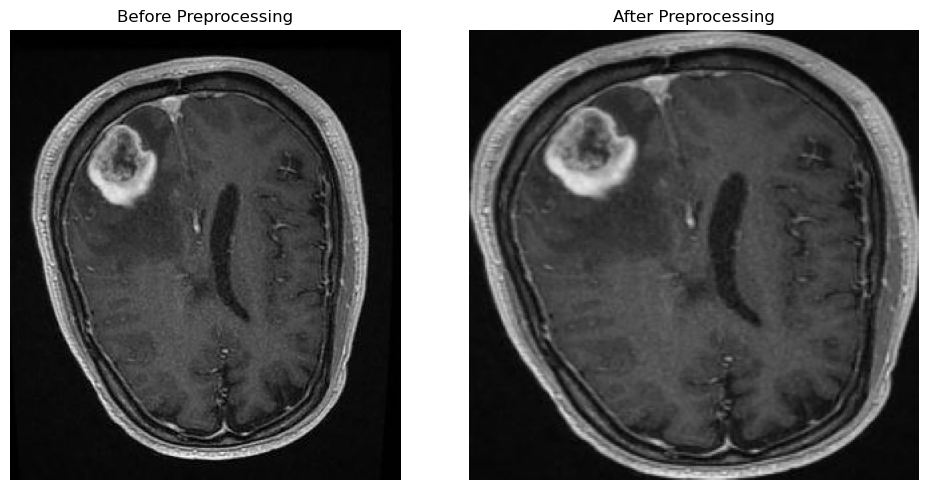

In [2]:
import cv2
import matplotlib.pyplot as plt

def display_before_after(image_path):
    # Load the image
    original_image = cv2.imread(image_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

    # Apply the preprocessing function
    preprocessed_image = crop_brain_contour(original_image.copy())

    # Display the original and preprocessed images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Before Preprocessing")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(preprocessed_image, cmap='gray')
    plt.title("After Preprocessing")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Provide the path to your image
image_path = "MRI_Scan_dataset/yes/y110.jpg"

# Call the display function
display_before_after(image_path)


!pip install keras

In [5]:
%pip install tensorflow


In [ ]:
import os
import cv2
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def get_image_paths_and_labels(data_path, label):
    images = [os.path.join(data_path, label, img) for img in os.listdir(os.path.join(data_path, label))]
    labels = [label] * len(images)
    return images, labels

def augment_images(data_path, all_images, all_labels, augmentations_per_image=10, image_processing_functions=None):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True
    )

    augmented_path = os.path.join(data_path, 'augmented')
    if os.path.exists(augmented_path):
        shutil.rmtree(augmented_path)
    
    for img_path, label in zip(all_images, all_labels):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if image_processing_functions:
            img = image_processing_functions(img)
        img = img.reshape((1,) + img.shape)
        save_prefix = os.path.basename(img_path).split('.')[0]
        save_dir = os.path.join(augmented_path, label)
        if not os.path.exists(save_dir):
            os.makedirs(save_dir)
        
        i = 0
        for batch in datagen.flow(img, batch_size=1, save_to_dir=save_dir, save_prefix=save_prefix, save_format='jpg'):
            i += 1
            if i >= augmentations_per_image:
                break

# Your dataset directory
dataset_dir = "MRI_Scan_dataset"

# Getting image paths and labels
yes_images, yes_labels = get_image_paths_and_labels(dataset_dir, 'yes')
no_images, no_labels = get_image_paths_and_labels(dataset_dir, 'no')

# Combining all images and labels
all_images = yes_images + no_images
all_labels = yes_labels + no_labels

# Calling the augment_images function with the crop_brain_contour function or any other preprocessing function you have
augment_images(dataset_dir, all_images, all_labels, augmentations_per_image=10, image_processing_functions=crop_brain_contour)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

def create_data_generators(data_path, image_size, batch_size):
    # Retrieving image paths and labels
    yes_images, yes_lcabels = get_image_paths_and_labels(os.path.join(data_path, 'augmented'), 'yes')
    no_images, no_labels = get_image_paths_and_labels(os.path.join(data_path, 'augmented'), 'no')

    # Combining all images and labels
    all_images = yes_images + no_images
    all_labels = yes_labels + no_labels

    # Splitting the data into training (80%), validation (15%), and test sets (5%)
    train_images, temp_images, train_labels, temp_labels = train_test_split(all_images, all_labels, test_size=0.20, random_state=42)
    val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.25, random_state=42)

    # Creating structured pandas DataFrames from the lists of images and labels
    train_df = pd.DataFrame({'filename': train_images, 'label': train_labels})
    val_df = pd.DataFrame({'filename': val_images, 'label': val_labels})
    test_df = pd.DataFrame({'filename': test_images, 'label': test_labels})

    # Creating an ImageDataGenerator object for image rescaling
    datagen = ImageDataGenerator(rescale=1./255)

    # Creating data generators for training, validation, and testing
    train_gen = datagen.flow_from_dataframe(train_df, x_col='filename', y_col='label', target_size=image_size, batch_size=batch_size, class_mode='binary', shuffle=True)
    val_gen = datagen.flow_from_dataframe(val_df, x_col='filename', y_col='label', target_size=image_size, batch_size=batch_size, class_mode='binary', shuffle=True)
    test_gen = datagen.flow_from_dataframe(test_df, x_col='filename', y_col='label', target_size=image_size, batch_size=batch_size, class_mode='binary', shuffle=False)

    return train_gen, val_gen, test_gen

# Your dataset directory
dataset_dir = "MRI_Scan_dataset"

# Calling the augment_images function
augment_images(dataset_dir, all_images, all_labels, augmentations_per_image=10, image_processing_functions=crop_brain_contour)

# Creating data generators
train_gen, val_gen, test_gen = create_data_generators(dataset_dir, image_size=(224, 224), batch_size=32)

Found 23993 validated image filenames belonging to 2 classes.
Found 4499 validated image filenames belonging to 2 classes.
Found 1500 validated image filenames belonging to 2 classes.
